In [486]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [487]:
data = pd.read_csv("amazon_data2.csv")
data.head()

,Brand,type,inches,cpu,ram,harddisksize,gpu,operatingsys,price
0,Lenovo,IdeaPadGaming,15.6Inches,Ryzen5,8GB,512GB,NaN,Windows11,"51,990.00"
1,Acer,Extensa,15.6Inches,Corei3,8GB,NaN,IntelUHDGraphics,Windows11,"32,990.00"
2,Lenovo,IdeaPad,15.6Inches,Corei5,16GB,NaN,IntelIrisXeGraphics,Windows11,"60,990.00"
3,HP,NaN,14Inches,Corei3,8GB,256GB,NaN,Windows11,"36,990.00"
4,Lenovo,IdeaPad,15.6Inches,Corei3,8GB,NaN,IntelUHDGraphics,Windows11,"33,446.00"


In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         785 non-null    object
 1   type          546 non-null    object
 2   inches        769 non-null    object
 3   cpu           689 non-null    object
 4   ram           749 non-null    object
 5   harddisksize  450 non-null    object
 6   gpu           402 non-null    object
 7   operatingsys  767 non-null    object
 8   price         769 non-null    object
dtypes: object(9)
memory usage: 55.3+ KB


In [489]:
data.duplicated().sum()

145

In [490]:
data=data.drop_duplicates()

In [491]:
data.isnull().sum()

Brand             0
type            231
inches           13
cpu              93
ram              33
harddisksize    227
gpu             329
operatingsys     15
price            16
dtype: int64

In [492]:
data=data.fillna(0)


In [493]:
data = data.groupby('Brand').filter(lambda x: len(x) >= 5)
data['Brand'].value_counts()


Lenovo    220
HP        151
ASUS      105
Dell       68
Acer       31
MSI        17
Apple       7
MI          5
AVITA       5
Name: Brand, dtype: int64

In [494]:
data['ram']=data['ram'].str.replace('GB','')
data['inches']=data['inches'].str.replace('Inches','')
data['inches']=data['inches'].str.replace('Centimetres','')
data['harddisksize']=data['harddisksize'].str.replace('GB','')
data['harddisksize']=data['harddisksize'].str.replace('TB','')
data['price']=data['price'].str.replace(',','')
data

,Brand,type,inches,cpu,ram,harddisksize,gpu,operatingsys,price
0,Lenovo,IdeaPadGaming,15.6,Ryzen5,8,512,0,Windows11,51990.00
1,Acer,Extensa,15.6,Corei3,8,NaN,IntelUHDGraphics,Windows11,32990.00
2,Lenovo,IdeaPad,15.6,Corei5,16,NaN,IntelIrisXeGraphics,Windows11,60990.00
3,HP,0,14,Corei3,8,256,0,Windows11,36990.00
4,Lenovo,IdeaPad,15.6,Corei3,8,NaN,IntelUHDGraphics,Windows11,33446.00
...,...,...,...,...,...,...,...,...,...
780,Lenovo,0,15.6,Corei3-6100,256,256,0,Windows10,1195.00
781,ASUS,0,15.6,AMDRyzen7,16,512,NVIDIAGeForceRTX2060,Windows10,133663.00
782,HP,HP,14,Corei3,256,256,IntelHDGraphics620,Windows10,78105.00
783,Lenovo,Thinkpad,13.3,AMDRyzen7,8,NaN,AMDRadeonRXVega8,Windows10Pro,148918.00


In [495]:
data['harddisksize'].fillna(0, inplace=True)
data

,Brand,type,inches,cpu,ram,harddisksize,gpu,operatingsys,price
0,Lenovo,IdeaPadGaming,15.6,Ryzen5,8,512,0,Windows11,51990.00
1,Acer,Extensa,15.6,Corei3,8,0,IntelUHDGraphics,Windows11,32990.00
2,Lenovo,IdeaPad,15.6,Corei5,16,0,IntelIrisXeGraphics,Windows11,60990.00
3,HP,0,14,Corei3,8,256,0,Windows11,36990.00
4,Lenovo,IdeaPad,15.6,Corei3,8,0,IntelUHDGraphics,Windows11,33446.00
...,...,...,...,...,...,...,...,...,...
780,Lenovo,0,15.6,Corei3-6100,256,256,0,Windows10,1195.00
781,ASUS,0,15.6,AMDRyzen7,16,512,NVIDIAGeForceRTX2060,Windows10,133663.00
782,HP,HP,14,Corei3,256,256,IntelHDGraphics620,Windows10,78105.00
783,Lenovo,Thinkpad,13.3,AMDRyzen7,8,0,AMDRadeonRXVega8,Windows10Pro,148918.00


In [496]:
data['Brand'] = data['Brand'].astype("string")
data['type'] = data['type'].astype("string")
data['inches'] = data['inches'].astype(float)
data['cpu'] = data['cpu'].astype("string")
data['ram'] = data['ram'].astype(float)
data['harddisksize'] = data['harddisksize'].astype(float)
data['gpu'] = data['gpu'].astype("string")
data['operatingsys'] = data['operatingsys'].astype("string")
data['price'] = data['price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 784
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         609 non-null    string 
 1   type          609 non-null    string 
 2   inches        604 non-null    float64
 3   cpu           609 non-null    string 
 4   ram           587 non-null    float64
 5   harddisksize  609 non-null    float64
 6   gpu           609 non-null    string 
 7   operatingsys  609 non-null    string 
 8   price         593 non-null    float64
dtypes: float64(4), string(5)
memory usage: 47.6 KB


In [497]:
def remove_words(s):
    return re.sub(r'\d+\s*[A-Z]+[\d]*\s*', '', s)

# Apply the function to the 'Text' column
data['type'] = data['type'].apply(remove_words)


In [498]:
data.iloc[:]


,Brand,type,inches,cpu,ram,harddisksize,gpu,operatingsys,price
0,Lenovo,IdeaPadGaming,15.6,Ryzen5,8.0,512.0,0,Windows11,51990.0
1,Acer,Extensa,15.6,Corei3,8.0,0.0,IntelUHDGraphics,Windows11,32990.0
2,Lenovo,IdeaPad,15.6,Corei5,16.0,0.0,IntelIrisXeGraphics,Windows11,60990.0
3,HP,0,14.0,Corei3,8.0,256.0,0,Windows11,36990.0
4,Lenovo,IdeaPad,15.6,Corei3,8.0,0.0,IntelUHDGraphics,Windows11,33446.0
...,...,...,...,...,...,...,...,...,...
780,Lenovo,0,15.6,Corei3-6100,256.0,256.0,0,Windows10,1195.0
781,ASUS,0,15.6,AMDRyzen7,16.0,512.0,NVIDIAGeForceRTX2060,Windows10,133663.0
782,HP,HP,14.0,Corei3,256.0,256.0,IntelHDGraphics620,Windows10,78105.0
783,Lenovo,Thinkpad,13.3,AMDRyzen7,8.0,0.0,AMDRadeonRXVega8,Windows10Pro,148918.0


<Axes: >

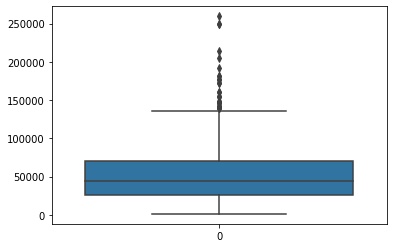

In [499]:
sns.boxplot(data['price'])

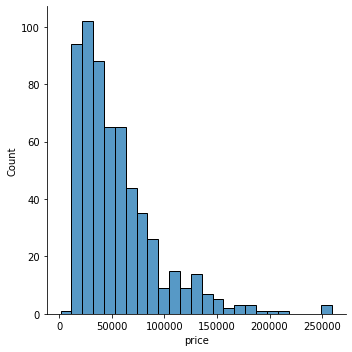

In [500]:
sns.displot(data['price'])

<Axes: >

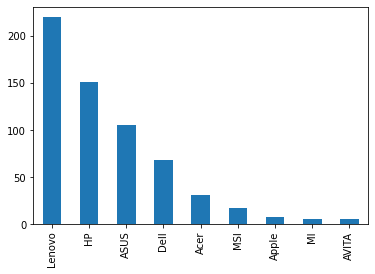

In [501]:
data['Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Brand', ylabel='price'>

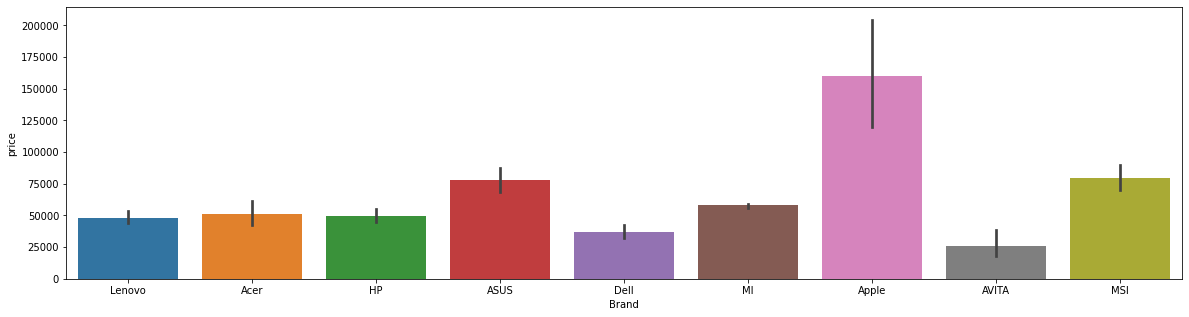

In [502]:
plt.figure(figsize=[20,5])
sns.barplot(x=data['Brand'],y=data['price'])

<Axes: >

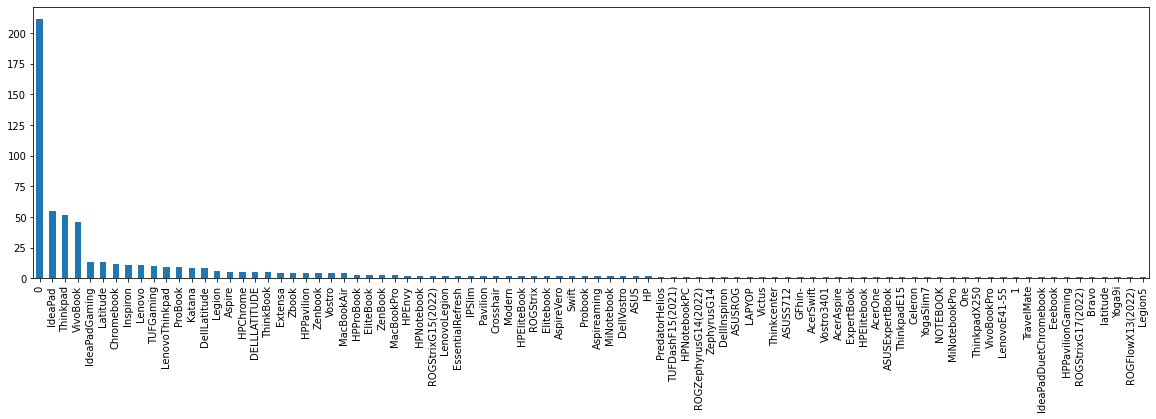

In [503]:
plt.figure(figsize=[20,5])
data['type'].value_counts().plot(kind='bar')

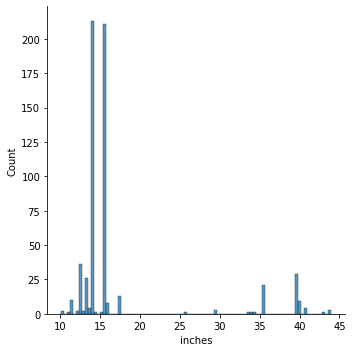

In [504]:
sns.displot(data['inches'])

<Axes: xlabel='inches', ylabel='price'>

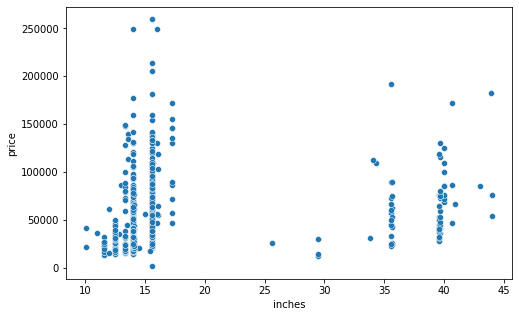

In [505]:
plt.figure(figsize = [8,5])
sns.scatterplot(x=data['inches'],y=data['price'])

In [506]:
def fetch_cpu(text):
  if text=='Corei5' or text =="Corei3" or text=="Corei7":
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return "AMD Processor"

In [507]:
data['cpu brand']=data['cpu'].apply(fetch_cpu)

<Axes: >

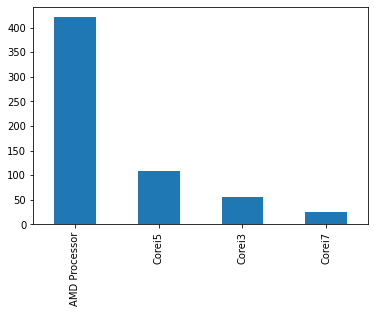

In [508]:
data['cpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='cpu brand', ylabel='price'>

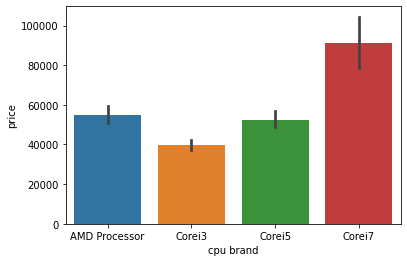

In [509]:
sns.barplot(x=data['cpu brand'],y=data['price'])

In [510]:
for i, gpu_name in enumerate(data['gpu']):
    if gpu_name.lower().startswith("intel"):
        data.at[i, 'gpu brand'] = "Intel"
    elif gpu_name.lower().startswith("amd"):
        data.at[i, 'gpu brand'] = "AMD"
    elif gpu_name.lower().startswith("nvidia"):
        data.at[i, 'gpu brand'] = "NVIDIA"





In [511]:
data['gpu brand'].value_counts()

Intel     206
NVIDIA     53
AMD        30
Name: gpu brand, dtype: int64

<Axes: xlabel='gpu brand', ylabel='price'>

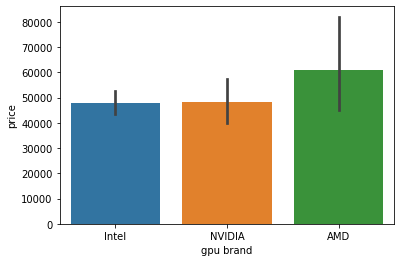

In [512]:
sns.barplot(x=data['gpu brand'],y=data['price'])

In [513]:
data=data.dropna()
data

,Brand,type,inches,cpu,ram,harddisksize,gpu,operatingsys,price,cpu brand,gpu brand
1,Acer,Extensa,15.6,Corei3,8.0,0.0,IntelUHDGraphics,Windows11,32990.0,Corei3,Intel
2,Lenovo,IdeaPad,15.6,Corei5,16.0,0.0,IntelIrisXeGraphics,Windows11,60990.0,Corei5,Intel
4,Lenovo,IdeaPad,15.6,Corei3,8.0,0.0,IntelUHDGraphics,Windows11,33446.0,Corei3,Intel
6,ASUS,VivoBook,16.0,Ryzen5,8.0,512.0,0,Windows11,46990.0,AMD Processor,Intel
9,HP,0,39.6,Athlon,8.0,512.0,0,Windows11,29212.0,AMD Processor,Intel
...,...,...,...,...,...,...,...,...,...,...,...
602,ASUS,0,15.6,0,8.0,0.0,0,Windows10,65990.0,AMD Processor,AMD
603,Lenovo,Legion,15.6,Ryzen54600H,8.0,1.0,0,Windows10,43992.0,AMD Processor,Intel
605,HP,EliteBook,14.0,Corei5,4.0,0.0,0,Windows10Pro,37999.0,Corei5,NVIDIA
607,Lenovo,0,15.6,Corei5,16.0,0.0,0,0,61970.0,Corei5,AMD


In [514]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [515]:
data=data.drop(columns=['cpu','gpu'])
data

,Brand,type,inches,ram,harddisksize,operatingsys,price,cpu brand,gpu brand
1,Acer,Extensa,15.6,8.0,0.0,Windows11,32990.0,Corei3,Intel
2,Lenovo,IdeaPad,15.6,16.0,0.0,Windows11,60990.0,Corei5,Intel
4,Lenovo,IdeaPad,15.6,8.0,0.0,Windows11,33446.0,Corei3,Intel
6,ASUS,VivoBook,16.0,8.0,512.0,Windows11,46990.0,AMD Processor,Intel
9,HP,0,39.6,8.0,512.0,Windows11,29212.0,AMD Processor,Intel
...,...,...,...,...,...,...,...,...,...
602,ASUS,0,15.6,8.0,0.0,Windows10,65990.0,AMD Processor,AMD
603,Lenovo,Legion,15.6,8.0,1.0,Windows10,43992.0,AMD Processor,Intel
605,HP,EliteBook,14.0,4.0,0.0,Windows10Pro,37999.0,Corei5,NVIDIA
607,Lenovo,0,15.6,16.0,0.0,0,61970.0,Corei5,AMD


In [516]:
category_counts=data['type'].value_counts()
data= data[data['type'].isin(category_counts[category_counts > 1].index)]

In [517]:
X=data.drop(columns=['price'])
y=np.log(data['price'])


In [518]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

Linear Regression




In [519]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.2268838491702625
MAE 0.3469471433561701


knn


In [520]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5798031524605742
MAE 0.2918910357862969


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decisiontree

In [521]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.771535849369008
MAE 0.2316073954007597


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVM

In [522]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5890594393717873
MAE 0.26750019109196815


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Randomforest

In [523]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.5659255776045897
MAE 0.2605679270647463


stacking

In [524]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.3421709753416967
MAE 0.3591985647433455
